Nam Hoang Nguyen

CAP 4770

Date: 04/20/2025

Machine Learning Assignment: Age, Ethnicity, and Gender Prediction using UTKFace Dataset

## 1. Data Preprocessing


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


dataset_path = '/content/UTKFace/UTKFace'

# Initialize lists
images = []
ages = []
genders = []
ethnicities = []

# Loop through image files
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.jpg.chip.jpg'):
        try:
            age, gender, ethnicity, _ = file_name.split('_', 3)
            age = int(age)
            gender = int(gender)
            ethnicity = int(ethnicity)

            # Load and resize image
            image_path = os.path.join(dataset_path, file_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100,100))

            # Append data
            images.append(image)
            ages.append(age)
            genders.append(gender)
            ethnicities.append(ethnicity)
        except:
            continue  # skip if there's an error in the filename or image

In [ ]:
MAX_SAMPLES = 10000  # Reduce to avoid memory crash
images = np.array(images[:MAX_SAMPLES]) / 255.0
ages = np.array(ages[:MAX_SAMPLES])
genders = np.array(genders[:MAX_SAMPLES])
ethnicities = np.array(ethnicities[:MAX_SAMPLES])

print("Image shape:", images.shape)
print("Age range:", ages.min(), "to", ages.max())

X_train, X_temp, age_train, age_temp, gender_train, gender_temp = train_test_split(
    images, ages, genders, test_size=0.3, random_state=42)
X_val, X_test, age_val, age_test, gender_val, gender_test = train_test_split(
    X_temp, age_temp, gender_temp, test_size=0.5, random_state=42)

print("\nTraining set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Image shape: (10000, 100, 100, 3)
Age range: 1 to 116

Training set: (7000, 100, 100, 3)
Validation set: (1500, 100, 100, 3)
Test set: (1500, 100, 100, 3)


## 2. Exploratory Data Analysis (EDA)
Perform EDA to understand the distribution of age and gender in the dataset
Visualize some example images from each class
Discuss any potential biases in the dataset and how they might affect model performance

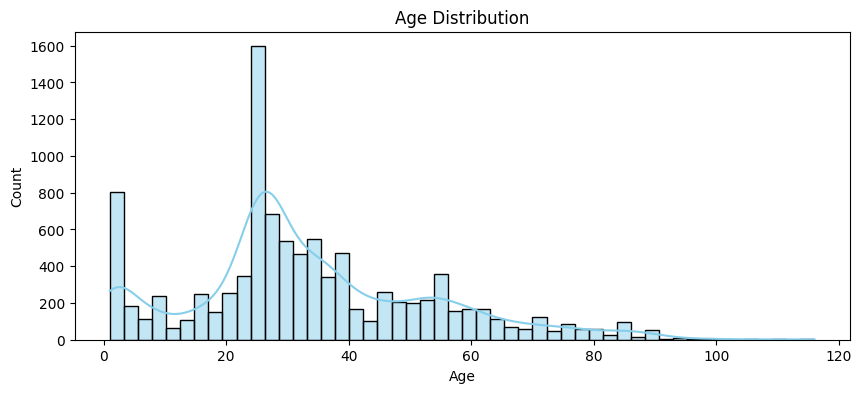

<ipython-input-19-3c06ad8d47dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=genders, palette='pastel')


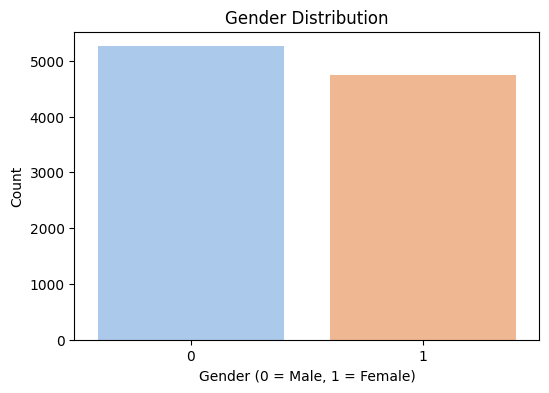

Age statistics:
Mean: 33.462700
Median: 29.000000
Min: 1
Max: 116

Gender statistics:
Male: 5257 (52.57%)
Female: 4743 (47.43%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 4))
sns.histplot(ages, bins=50, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=genders, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

# Age statistics
print(f"Age statistics:")
print(f"Mean: {np.mean(ages):2f}")
print(f"Median: {np.median(ages):2f}")
print(f"Min: {np.min(ages)}")
print(f"Max: {np.max(ages)}")

# Gender statistics
print(f"\nGender statistics:")
gender_counts = np.bincount(genders)
print(f"Male: {gender_counts[0]} ({gender_counts[0]/len(genders)*100:.2f}%)")
print(f"Female: {gender_counts[1]} ({gender_counts[1]/len(genders)*100:.2f}%)")

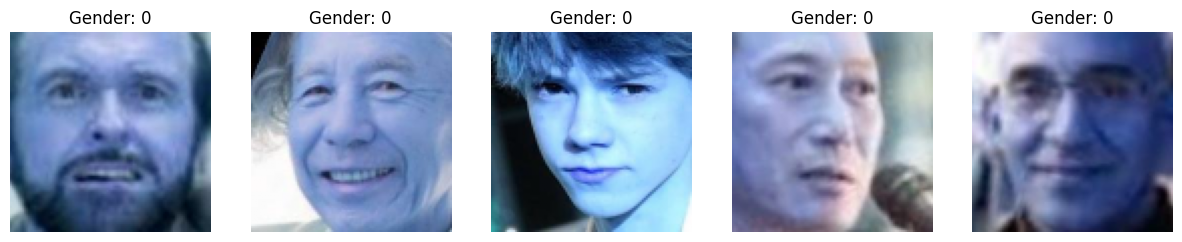

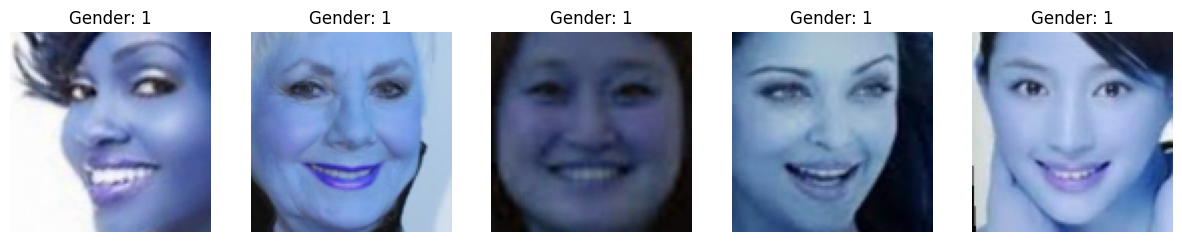

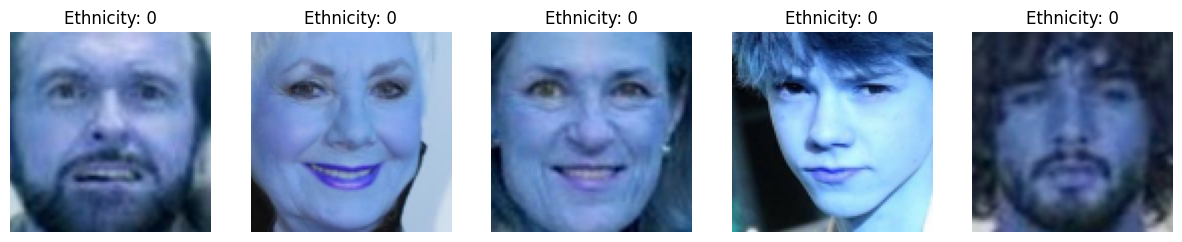

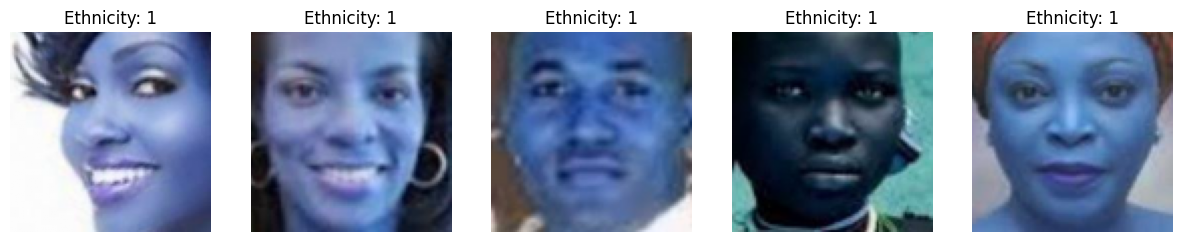

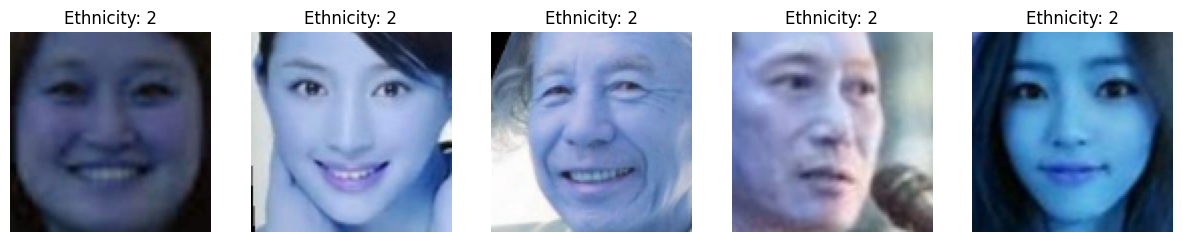

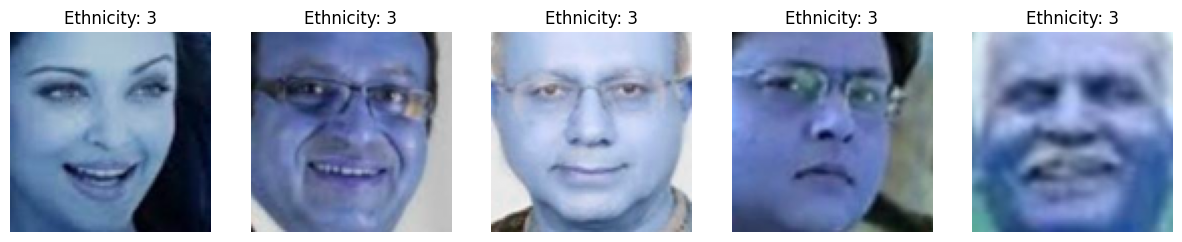

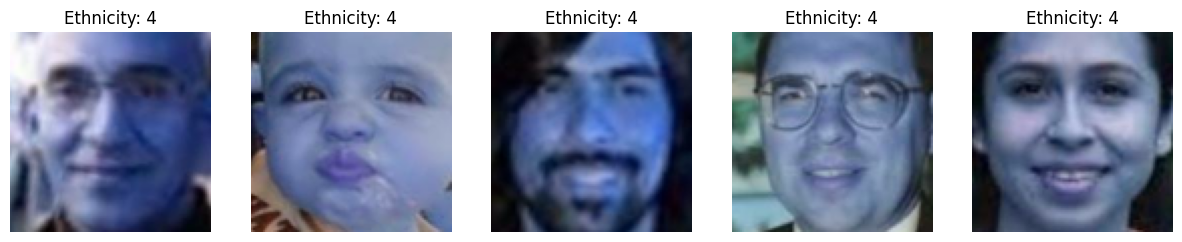

In [ ]:
# Show a few sample images for each gender and ethnicity
def show_examples(label_array, label_name, label_value, n=5):
    indices = [i for i, val in enumerate(label_array) if val == label_value][:n]
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(f"{label_name}: {label_value}")
    plt.show()

# Show examples
show_examples(genders, "Gender", 0)  # Male
show_examples(genders, "Gender", 1)  # Female

for i in range(5):  # Ethnicity 0 to 4
    show_examples(ethnicities, "Ethnicity", i)

### Discuss any potential biases in the dataset and how they might affect model performance
1. Uneven Age Distribution: Some age groups (like children or elderly) might have fewer samples. This can cause the model to perform worse on underrepresented ages, leading to higher prediction errors
2. Gender Imbalance: if there are significantly more images of one gender, the model may become biased toward that gender during classification
3. Ethnicity Representation: some classes may have way more samples than others. This can cause poor generalization for less represented groups.



## 3. Model Training
### 1. Convolutional Neutral Network (CNN)
Train a CNN model to predict the age and gender of individuals.
Evaluate the model using appropriate metrics

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# CNN model builder
def create_cnn_model(input_shape, output_units, activation=None):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation=activation)
    ])
    return model

# Define input shape
input_shape = X_train.shape[1:]

# Age prediction model
cnn_age_model = create_cnn_model(input_shape, output_units=1)
cnn_age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Gender prediction model
cnn_gender_model = create_cnn_model(input_shape, output_units=1, activation='sigmoid')
cnn_gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnn_age_history = cnn_age_model.fit(
    X_train, age_train,
    validation_data=(X_val, age_val),
    epochs=10, batch_size=32)

cnn_gender_history = cnn_gender_model.fit(
    X_train, gender_train,
    validation_data=(X_val, gender_val),
    epochs=10, batch_size=32)

cnn_age_loss, cnn_age_mae = cnn_age_model.evaluate(X_test, age_test)
cnn_gender_loss, cnn_gender_acc = cnn_gender_model.evaluate(X_test, gender_test)

print(f"\nCNN Age MAE: {cnn_age_mae:.2f}")
print(f"CNN Gender Accuracy: {cnn_gender_acc:.2%}")


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 568.8876 - mae: 18.2905 - val_loss: 388.0391 - val_mae: 15.7684
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 354.0553 - mae: 14.4163 - val_loss: 257.9619 - val_mae: 12.7387
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 258.8969 - mae: 12.3842 - val_loss: 310.5237 - val_mae: 14.8648
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 232.9230 - mae: 11.5954 - val_loss: 180.5768 - val_mae: 10.0246
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 190.7613 - mae: 10.4039 - val_loss: 166.6475 - val_mae: 9.9077
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 158.7910 - mae: 9.5275 - val_loss: 143.3168 - val_mae: 8.6792
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 132.5162 - mae: 8.5420 - val_loss: 138.1333 - val_mae: 8.4974
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 126.4676 - mae: 8.4154 - val_loss: 134.0177 - val_mae: 8.4684
Epoch 9

## 2. Multi-Layer Perceptrons (MLP)
Train an MLP model to predict the age and gender of individuals using features derived from the image data.
Evaluate the model using the same metrics as used for the CNN model.

In [ ]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

def create_mlp_model(input_dim, output_units, activation=None):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation=activation)
    ])
    return model

# MLP: Age & Gender models
mlp_age_model = create_mlp_model(X_train_flat.shape[1], 1)
mlp_age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

mlp_gender_model = create_mlp_model(X_train_flat.shape[1], 1, activation='sigmoid')
mlp_gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
mlp_age_history = mlp_age_model.fit(
    X_train_flat, age_train,
    validation_data=(X_val_flat, age_val),
    epochs=10, batch_size=32)

mlp_gender_history = mlp_gender_model.fit(
    X_train_flat, gender_train,
    validation_data=(X_val_flat, gender_val),
    epochs=10, batch_size=32)

mlp_age_loss, mlp_age_mae = mlp_age_model.evaluate(X_test_flat, age_test)
mlp_gender_loss, mlp_gender_acc = mlp_gender_model.evaluate(X_test_flat, gender_test)

print(f"\nMLP Age MAE: {mlp_age_mae:.2f}")
print(f"MLP Gender Accuracy: {mlp_gender_acc:.2%}")

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 489.7776 - mae: 16.7929 - val_loss: 383.1880 - val_mae: 15.7563
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 331.3026 - mae: 13.9816 - val_loss: 266.8916 - val_mae: 12.3805
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 288.9493 - mae: 12.9232 - val_loss: 263.6647 - val_mae: 11.9158
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 272.4696 - mae: 12.5471 - val_loss: 245.7448 - val_mae: 11.6733
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 257.8282 - mae: 12.0614 - val_loss: 243.4176 - val_mae: 11.3698
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 241.7240 - mae: 11.7237 - val_loss: 225.7568 - val_mae: 11.0295
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 226.2228 - mae: 11.3122 - val_loss: 244.8700 - val_mae: 11.4032
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 222.6302 - mae: 11.3813 - val_loss: 222.8895 - val_mae: 11.0578
Epoch 9

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


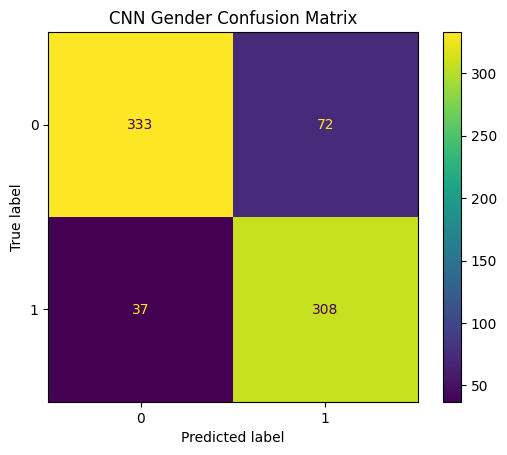

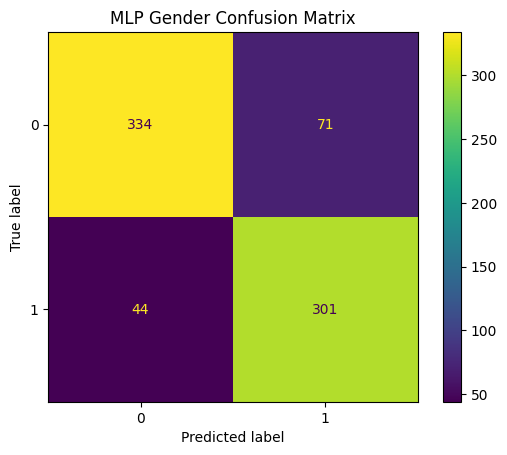

In [ ]:
# Confusion matrix for gender predictions:
cnn_gender_preds = (cnn_gender_model.predict(X_test) > 0.5).astype(int)
mlp_gender_preds = (mlp_gender_model.predict(X_test_flat) > 0.5).astype(int)

ConfusionMatrixDisplay(confusion_matrix(gender_test, cnn_gender_preds)).plot()
plt.title("CNN Gender Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(confusion_matrix(gender_test, mlp_gender_preds)).plot()
plt.title("MLP Gender Confusion Matrix")
plt.show()



## CNN confusion matrix:
True Positives (Male predicted as Male): 333

True Negatives (Female predicted as Female): 308

False Positives (Female misclassified as Male): 37

False Negatives (Male misclassified as Female): 72

## MLP confusion matrix:
True Positives (Male predicted as Male): 334

True Negatives (Female predicted as Female): 301

False Positives (Female misclassified as Male): 44

False Negatives (Male misclassified as Female): 71

## Conclusion
Both models misclassifies more males as females than it does females as males.
This could indicate a bias toward predicting "female" when uncertain and slight feature similarity in faces/images that confuses the model.



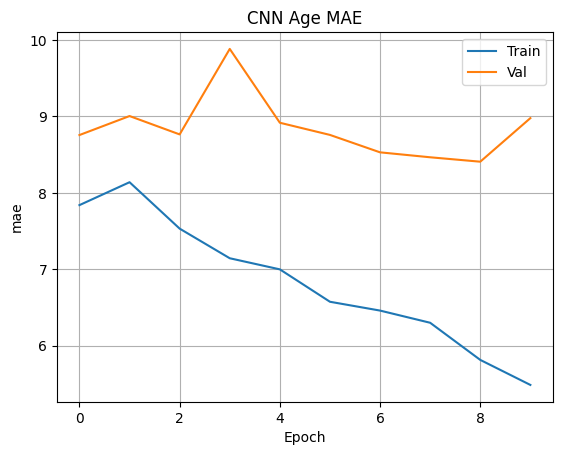

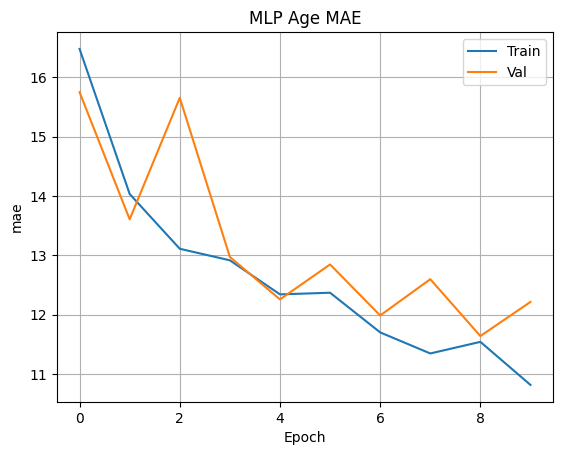

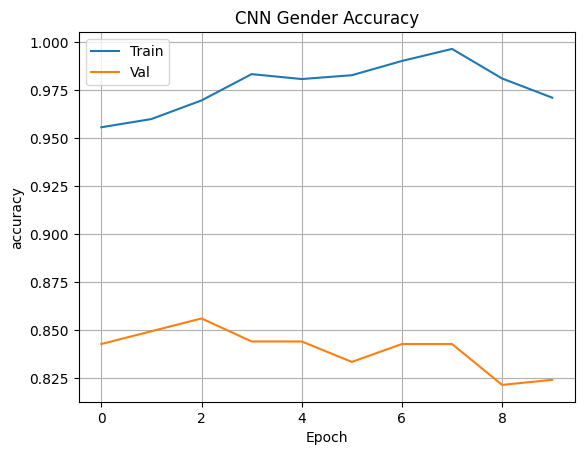

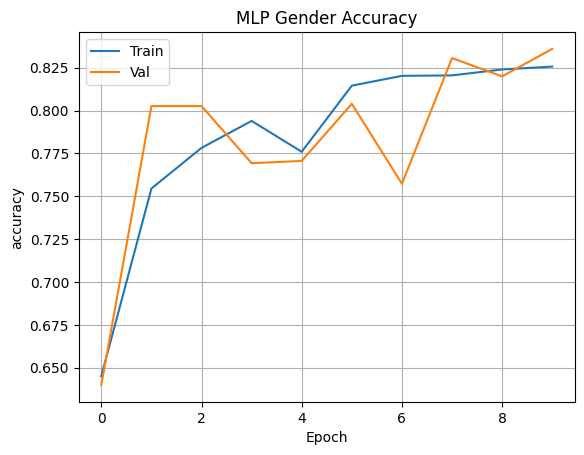

In [ ]:
# Plot Metrics
def plot_metrics(history, metric, title):
    plt.plot(history.history[metric], label='Train')
    plt.plot(history.history[f'val_{metric}'], label='Val')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metrics(cnn_age_history, 'mae', 'CNN Age MAE')
plot_metrics(mlp_age_history, 'mae', 'MLP Age MAE')
plot_metrics(cnn_gender_history, 'accuracy', 'CNN Gender Accuracy')
plot_metrics(mlp_gender_history, 'accuracy', 'MLP Gender Accuracy')

### CNN Age MAE (Mean Absolute Error):
- Training MAE steadily decreases, showing good learning.
- Validation MAE remains flat and higher than training, especially after epoch 3.
--> Model may be slightly overfitting.

### MLP Age MEA (Mean Absolute Error):
- Training MAE steadily decreases, indicating the model is learning.
- Validation MAE also decrease with some fluctuations.
--> No clear overfitting. Model is well-fit.

### CNN Gender Accuracy:
- Training accuracy increases close to 100%.
- Validation accuracy stays flat around 85%.
--> The model is overfitting.

### MLP Gender Accuracy:
- Training Accuracy improves and remains above 82%.
- Validation Accuracy improves as well with minor ups and downs.
--> No overfitting




## 4. Model Comparison:
### Validation and Test Set Performance:

CNN: MAE = 7.999, Accuracy = 86.87%

MLP: MAE = 12.91, Accuracy = 85.40%

--> CNN outperforms MLP on both tasks:
+ Lower MAE for age prediction -> CNN captures visual features better.
+ Higher gender classification accuracy -> better at identifying subtle differences in facial features.

### Training Time and Computational Resources:
CNN:
+ Requires more time and CPU acceleration due to convolution layers.
+ More parameters, especially in convolution + pooling layers.
+ Typically needs longer training and more memory.
+ Complex model architecture with multiple convolutional, pooling, and dense layers.


MLP:
+ Faster to train (especially on CPU).
+ Simpler structure and less resource-intensive.
+ Fully connected layers architecture.

### Strengths and Weaknesses of each approach in the context:

CNN:
+ Strengths:
CNN maintain the 2D structure of images using convolutional filters. This is important for understanding facial features (eyes, jawline, skin texture, face shape, and wrinkles) which are key for both age and gender.
CNN have higher performance (lower MAE for age and higher accuracy for gender).
+ Weaknesses: require GPUs for efficient training, and long training time, especially with larger datasets.

MLP:
+ Strengths:
MLP is easier to implement and train with faster training, especially on smaller datasets.
Lower memory and compute requirements.

+ Weaknesses:
Images must be flattened into 1D vectors, losing the spatial relationships. This can result bad worse in tasks that depend on image layout such as face recognition.
Lower performance compared to CNN.

